In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
from minisom import MiniSom
import pandas as pd

In [22]:
base = pd.read_csv('wines.csv')
X = base.iloc[:,1:14].values
y = base.iloc[:,0].values

In [23]:
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [24]:
som = MiniSom(x = 8, y = 8, input_len = 13, sigma = 1.0, learning_rate = 0.5, random_seed = 2)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [25]:
q = som.activation_response(X)

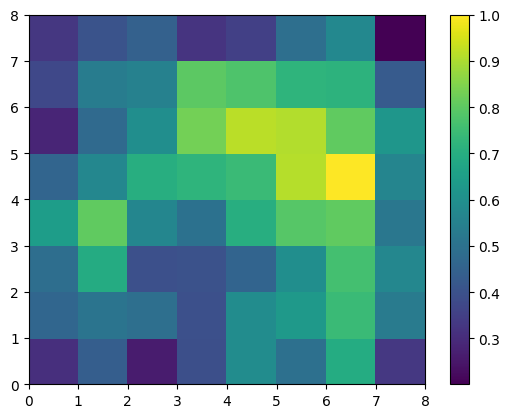

In [26]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()


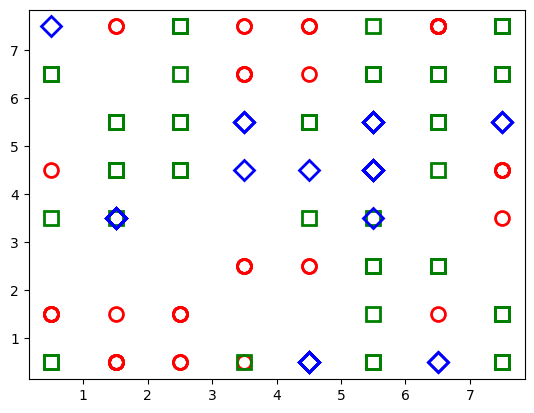

In [27]:
w = som.winner(X[0])
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']
y[y == 1] = 0
y[y == 2] = 1
y[y == 3] = 2

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor = 'None', 
         markersize = 10, markeredgecolor = color[y[i]], markeredgewidth = 2)
    
mapeamento = som.win_map(X)